<a href="https://colab.research.google.com/github/Abubakar26/CNN-Fyp/blob/master/cnnp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Classification of Pneumonia and Tuberculosis from Chest X-rays**

**Loading Libraries and mounting GDrive**

In [1]:
%tensorflow_version 1.x
from google.colab import drive 
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Colab Notebooks"
import pickle as pk
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import pandas as pd
from keras.optimizers import SGD
from sklearn.model_selection import KFold
batch_size = 128
num_classes = 3
epochs = 10
import os

TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


**Loading Dataset (X-RAYS and Labels)**

In [0]:
pickle_in1=open(DATA_PATH+"/colorxray","rb")
X=pk.load(pickle_in1)
pickle_in2=open(DATA_PATH+"/colorlabels","rb")
Y=pk.load(pickle_in2)
print("Done")

**Splitting Dataset **

In [0]:
x_train,x_test,y_train,y_test = tts(X,Y,train_size=0.8)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print("Done")

**Normalizing images by making them in center**

In [0]:
x_train=x_train/255-0.5
x_test=x_test/255-0.5
print('Done')

**Shapes of Splitted Data into variables**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ytest 1
Xtrain (5576, 90, 90, 3)
Ytrain (5576,)
Ytest (1394,)
Xtest (1394, 90, 90, 3)


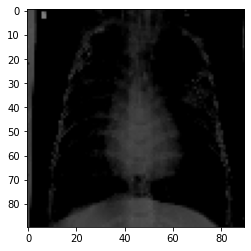

In [7]:
print("ytest",y_test[0])
print("Xtrain",x_train.shape)
print("Ytrain",y_train.shape)
print("Ytest",y_test.shape)
print("Xtest",x_test.shape)
plt.imshow(x_train[200])
plt.show()
print('Done')

**Converting Labels in One hot-encoding**

In [0]:
y_train = keras.utils.to_categorical(y_train,3)
y_test = keras.utils.to_categorical(y_test,3)
print("Done")

**Creating Neural Network**

In [9]:
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),activation='relu', input_shape=(90,90,3)))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(BatchNormalization(momentum=0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
model.get_weights()
history=model.fit(x_train,y_train, batch_size=batch_size, shuffle=True ,epochs=epochs,verbose=1 ,validation_split=0.1,callbacks=[Callback()] )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 5018 samples, validate on 558 samples
Epoch 1/10
5018/5018 [==============================] - 14s 3ms/step - loss: 0.5920 - accuracy: 0.7997 - val_loss: 0.4145 - val_accuracy: 0.8710
Epoch 2/10
5018/5018 [==============================] - 6s 1ms/step - loss: 0.3745 - accuracy: 0.8828 - val_loss: 0.3437 - val_accuracy: 0.8925
Epoch 3/10
5018/5018 [==============================] - 6s 1ms/step - loss: 0.2967 - accuracy: 0.9085 - val_loss: 0.3099 - val_accuracy: 0.9014
Epoch 4/10
5018/5018 [==============================] - 6s 1ms/step - loss: 0.2503 - accuracy: 0.9239 - val_loss: 0.3488 - val_accuracy: 0.8781
Epoch 5/10
5018/5018 [==============================] - 6s 1ms/step - loss: 0.2063 - accuracy: 0.9406 - val_loss: 0.3256 - val_accuracy: 0.8961
Epoch 6/10
5018/5018 [==============================] - 6s 1ms/step - loss: 0.1834 - accuracy: 0.9440 - val_loss: 0.2087 - val_accuracy: 0.9301
Epoch

**Model Summary / Architecture**

In [13]:
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 86, 86, 128)       9728      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 83, 83, 128)       262272    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

**Plotting Loss and Accuracy of Training and Validation**

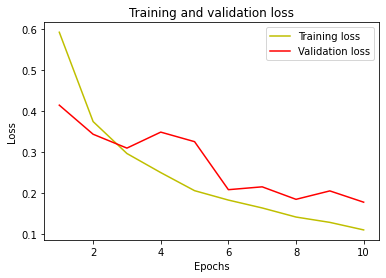

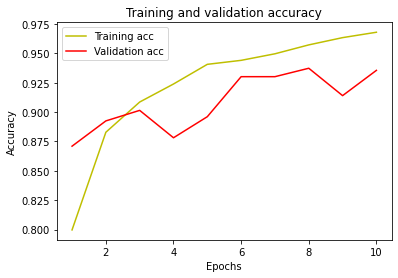

In [10]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
accu = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accu, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluating model on test set **

In [11]:
ev=model.evaluate(x_test,y_test)
print("Evaluation",np.argmax(ev))
print("%s: %.2f%%" % (model.metrics_names[1], ev[1]*100))

1394/1394 [==============================] - 1s 553us/step
Evaluation 1
accuracy: 93.26%


**Saving the model**

In [15]:
model.save("cnn1xp2")
print("Saved")

Saved


**Using our saved model**

In [19]:
import pickle as pk
from google.colab import drive 
from keras.models import load_model
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Colab Notebooks"
model=load_model('cnn1xp2')
import cv2
cat=['Normal','Pneumonia','TB']
img=cv2.imread(DATA_PATH+'/person5_bacteria_15.jpeg')
img=cv2.resize(img,(90,90))
import numpy
img=numpy.reshape(img,(-1,90,90,3))
img=img/255-0.5
pred=model.predict(img)
pred=np.argmax(pred)
if pred==0:
  print("Normal")
elif pred==1:
  print("Pneumonia")
elif pred==2:
  print("Tuberculosis")    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pneumonia
